<a href="https://colab.research.google.com/github/YigitBCesur/Feature-Engineering/blob/main/Feature%20Engineering%20-%202-1%20(%20Zscore%2C%20Standard%20Deviation%20)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas.core.indexes.interval import InvalidIndexError
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [125]:
from google.colab import files

uploaded = files.upload()

Saving weight-height.csv to weight-height (4).csv


In [126]:
df = pd.read_csv("weight-height.csv")
df.sample(10)
#df.head()

,Gender,Height,Weight
6236,Female,60.709793,117.333174
9077,Female,63.900115,142.847850
6730,Female,64.640857,119.329330
1530,Male,72.618409,207.161233
3054,Male,67.471170,181.552992
3346,Male,67.880407,177.249146
700,Male,69.760095,187.812062
6699,Female,65.074119,149.230333
5864,Female,66.690353,157.793825
9963,Female,61.671529,140.024792


In [127]:
df.shape

(10000, 3)

### **Lets see the histogram**

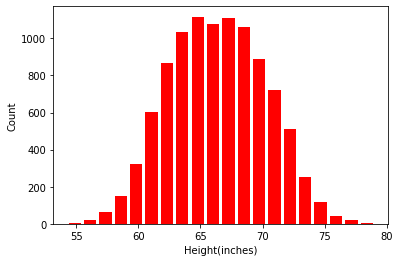

In [128]:
plt.hist(df.Height, bins=20 , rwidth=0.8 , color='r')
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

Histogram is  Normal distribution 

**Another way for distribution diagram with curve**

In [129]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [130]:
display ('Minimum : ', df['Height'].min())

'Minimum : '

54.2631333250971

In [131]:
display ('Maximum : ',df['Height'].max())

'Maximum : '

78.9987423463896

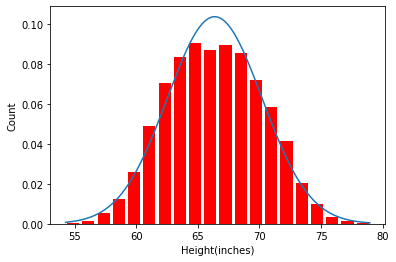

In [132]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Height, bins=20 , rwidth=0.8 , color='r', density=True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

range= np.arange(df['Height'].min(),df['Height'].max(), (0.1))
plt.plot(range, norm.pdf(range, df['Height'].mean(), df['Height'].std()))


**About Standard Deviation and empirical rule**

[link text](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule#/media/File:Empirical_rule_histogram.svg)

**1.Outlier detection and removal with STANDARD DEVIATION**

mean        66.367560

std          3.847528

In [133]:
mean = 66.367560
std =  3.847528

Third_upper= mean + 3*std
Third_upper

77.910144

In [134]:
Third_lower= mean - 3*std
Third_lower

54.824976

In [135]:
upper_limit = df['Height'].mean() +(3*df['Height'].std())
lower_limit = df['Height'].mean() -(3*df['Height'].std())


print("3 STD  is UPPER limit {}". format(upper_limit))
print("3 STD  is LOWER limit {}". format(lower_limit))


3 STD  is UPPER limit 77.91014411714093
3 STD  is LOWER limit 54.82497539250156


QUTLIERS ON DATAFRAME ---------->>>>>>>>>>> 

Lets see the variables that are 3 standard away from Median on Data Frame 

These are not data errors but many times we can actually remove those points an outliers

In [136]:
outliers=  df[(df['Height']>upper_limit) | (df['Height']<lower_limit) ]
print('we have ', format(outliers['Height'].count()), 'outliers')
display(outliers)

we have  7 outliers


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


Removing OUTLIERS not by renewed dataframe 

In [137]:
veri = df[(df['Height']<upper_limit) & (df['Height']>lower_limit) ]             # aware of & and Conditions   -  after removal of outliers
display(veri.shape)

(9993, 3)

**2.Outlier detection and removal with ZSCORE**

ZScore indicates how many standard deviation away a data point is.
* mean        66.367560
* std          3.847528

if a value of data is 70.21 , then ZScore for that is +1 . because 1 standard deviation upper

if a value of data is 58.67 , then ZScore for that is -2 . because -2 standard deviation 

if a value of data is 77.91 , then ZScore for that is 3 . because 3 standard deviation 

In [138]:
df['ZScore']=((df['Height'])-(df['Height'].mean()))/ (df['Height'].std())
df.sample(5)

,Gender,Height,Weight,ZScore
2666,Male,71.154717,190.860975,1.244216
9399,Female,65.861869,149.870735,-0.131433
4641,Male,69.960522,199.816810,0.933836
4421,Male,67.143655,182.609139,0.201713
6917,Female,68.458911,176.152648,0.543557


In [139]:
# Lets see calculation
(62.321043-66.367560)/3.847528

-1.0517186619564547

**Finding Ouliers with ZSCORE on DataFrame**

In [140]:
df[df['ZScore']>3]                          # UPPER LIMIT with 3

,Gender,Height,Weight,ZScore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [141]:
df[df['ZScore']<-3]                   # LOWER LIMIT with -3

,Gender,Height,Weight,ZScore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


**NEW DATASET without OUTLIERS**

In [142]:
df [ (df['ZScore']>-3)  &  (df['ZScore']<3) ]

,Gender,Height,Weight,ZScore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090
